In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.basemap import Basemap

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [3]:
data['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

### Данные по Америке включают в себя два региона: Южная Америка и Северная Америка

In [4]:
america_data = data[(data['region_txt'] == 'South America') | (data['region_txt'] == 'North America')]

In [5]:
america_regions = america_data.groupby('region_txt').size().reset_index()

In [6]:
america_regions.columns = ['region', 'values']

### Посмотрим на распределение террористических актов по Южной и Северной америке. Отметим локации актов точками на карте: красные точки - Южная Америка, синие точки - Северная Америка.

In [7]:
america_regions

,region,values
0,North America,3456
1,South America,18978


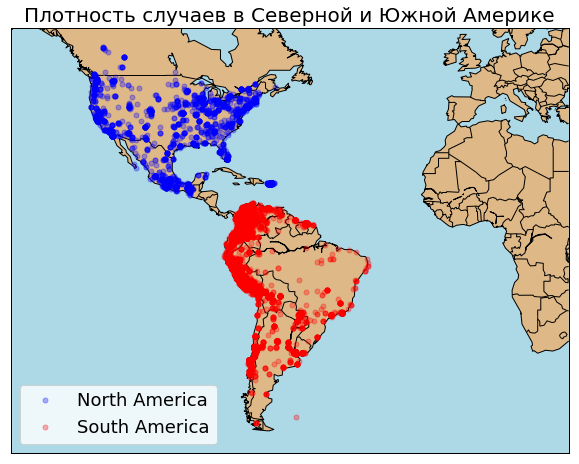

In [8]:
plt.figure(figsize=(10,10))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=60,llcrnrlon=-150,urcrnrlon=30)
m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='burlywood',lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')

regions = list(set(america_data.region_txt))
colors = ['blue', 'red']

for i,region in enumerate(regions):
    x, y = m(list(america_data.longitude[america_data.region_txt == region]),
            (list(america_data.latitude[america_data.region_txt == region])))
    m.plot(x, y, 'o', markersize=5, color=colors[i], label=region, alpha=0.3)
    
plt.title("Плотность случаев в Северной и Южной Америке", fontsize=20)
plt.legend(fontsize=18)
plt.show()

### Построим диаграмму распределения случаев по странам Америки:

In [9]:
american_countries = america_data.groupby('country_txt').size().reset_index()

In [10]:
american_countries.columns = ['country', 'values']

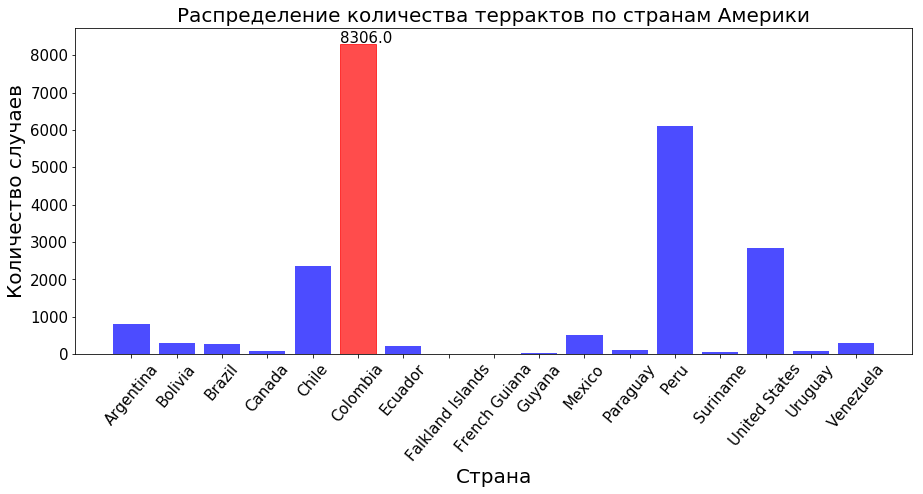

In [11]:
plt.figure(figsize=(15,6))
v = plt.bar(american_countries['country'], american_countries['values'], 
            color='blue', alpha=0.7)
plt.xlabel('Cтрана', fontsize=20)
plt.ylabel('Количество случаев', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=50, fontsize=15)
plt.title("Распределение количества террактов по странам Америки", fontsize=20)

heights = np.array([])
for el in v[:]:
    heights = np.append(heights, el.get_height())

max_height, max_num = np.max(heights), np.argmax(heights)

plt.text(v[max_num].get_x(), max_height+10, max_height, size=15)
v[max_num].set_color('red')

plt.show()

### Максимальное число случаев зарегистрировано в Колумбии, посмотрим на распределение внутри городов Колумбии

In [12]:
america_city = america_data[america_data['country_txt'] == 'Colombia'] 

In [13]:
american_city = america_city.groupby('city').size().reset_index()

In [14]:
american_city.columns=['city', 'values']

In [15]:
american_city = american_city.sort_values(by='values', ascending=False)[:30]

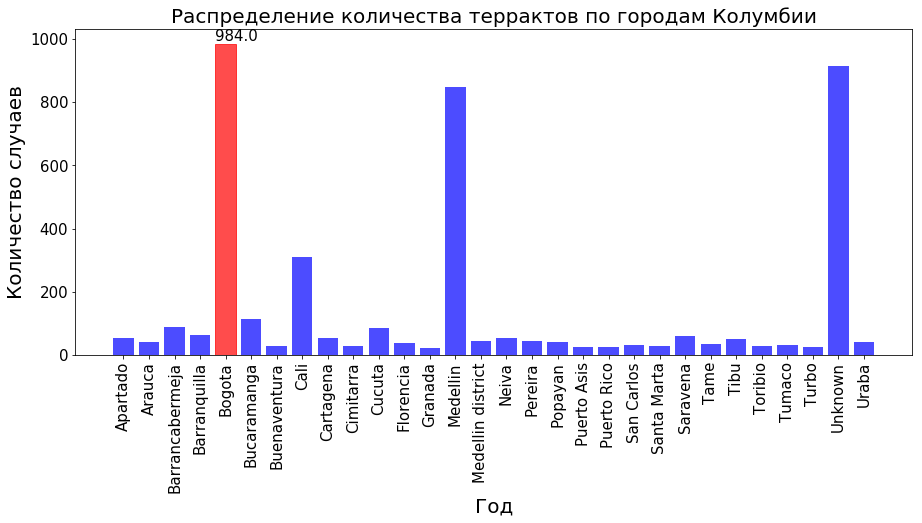

In [16]:
plt.figure(figsize=(15,6))
v = plt.bar(american_city['city'], american_city['values'], color='blue', alpha=0.7)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество случаев', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Распределение количества террактов по городам Колумбии", fontsize=20)

heights = np.array([])
for el in v[:]:
    heights = np.append(heights, el.get_height())

max_height, max_num = np.max(heights), np.argmax(heights)

plt.text(v[max_num].get_x(), max_height+10, max_height, size=15)
v[max_num].set_color('red')


### Распределение случаев в Америке по годам:

In [17]:
american_years = america_data.groupby('iyear').size().reset_index()

In [18]:
american_years.columns = ['year', 'values']

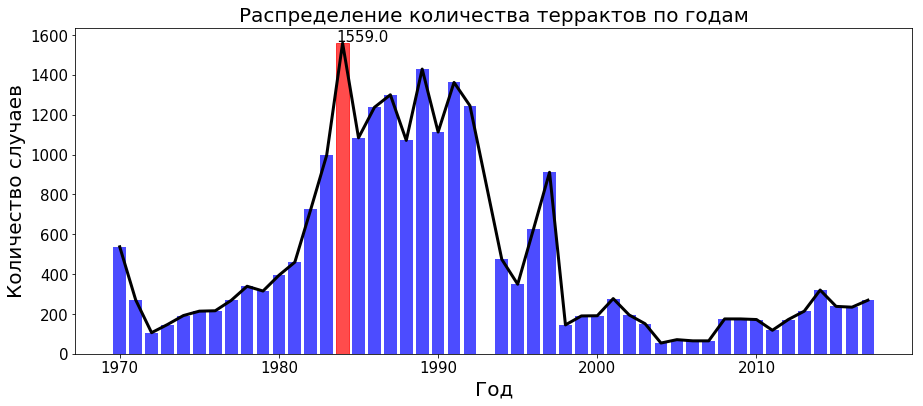

In [19]:
plt.figure(figsize=(15,6))
v = plt.bar(american_years['year'], american_years['values'], color='blue', alpha=0.7)
plt.plot(american_years['year'], american_years['values'], color='black', lw=3)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество случаев', fontsize=20)
plt.title("Распределение количества террактов по годам", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

heights = np.array([])
for el in v[:]:
    heights = np.append(heights, el.get_height())

max_height, max_num = np.max(heights), np.argmax(heights)

plt.text(v[max_num].get_x(), max_height+10, max_height, size=15)
v[max_num].set_color('red')


### Диаграмма распределения вида совершения террористических дейсвий

In [20]:
america_terror = america_data.groupby('targtype1_txt').size().reset_index()

In [21]:
america_terror.columns = ['type', 'values']

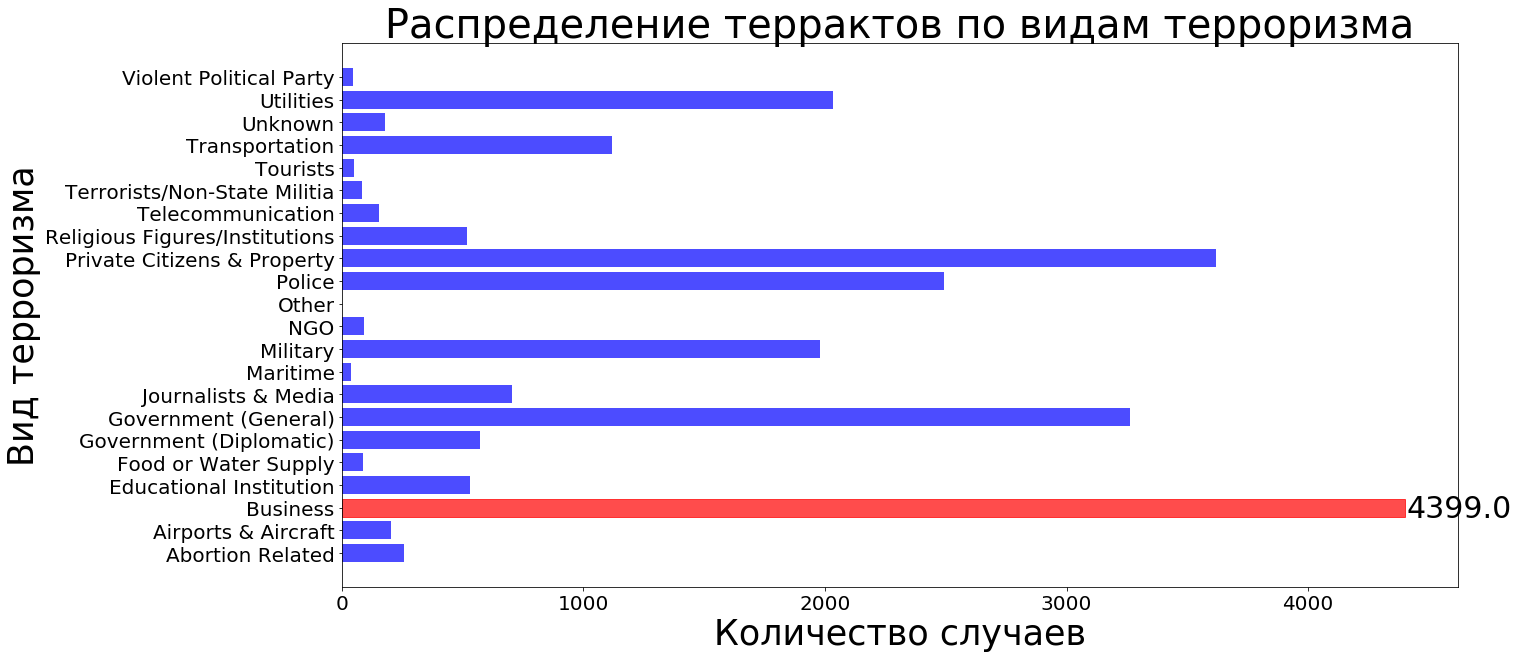

In [22]:
plt.figure(figsize=(20,10))
v = plt.barh(america_terror['type'], america_terror['values'], color='blue', alpha=0.7)

widths = np.array([])
for el in v[:]:
    widths = np.append(widths, el.get_width())

max_width, max_num = np.max(widths), np.argmax(widths)

plt.text(max_width+10, v[max_num].get_y(), max_width, size=30)
v[max_num].set_color('red')

plt.ylabel('Вид терроризма', fontsize=35)
plt.xlabel('Количество случаев', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Распределение террактов по видам терроризма", fontsize=40)
plt.show()

### Диаграмма распределения типов атак 

In [23]:
america_attack = america_data.groupby('attacktype1_txt').size().reset_index()

In [24]:
america_attack.columns = ['attack', 'values']

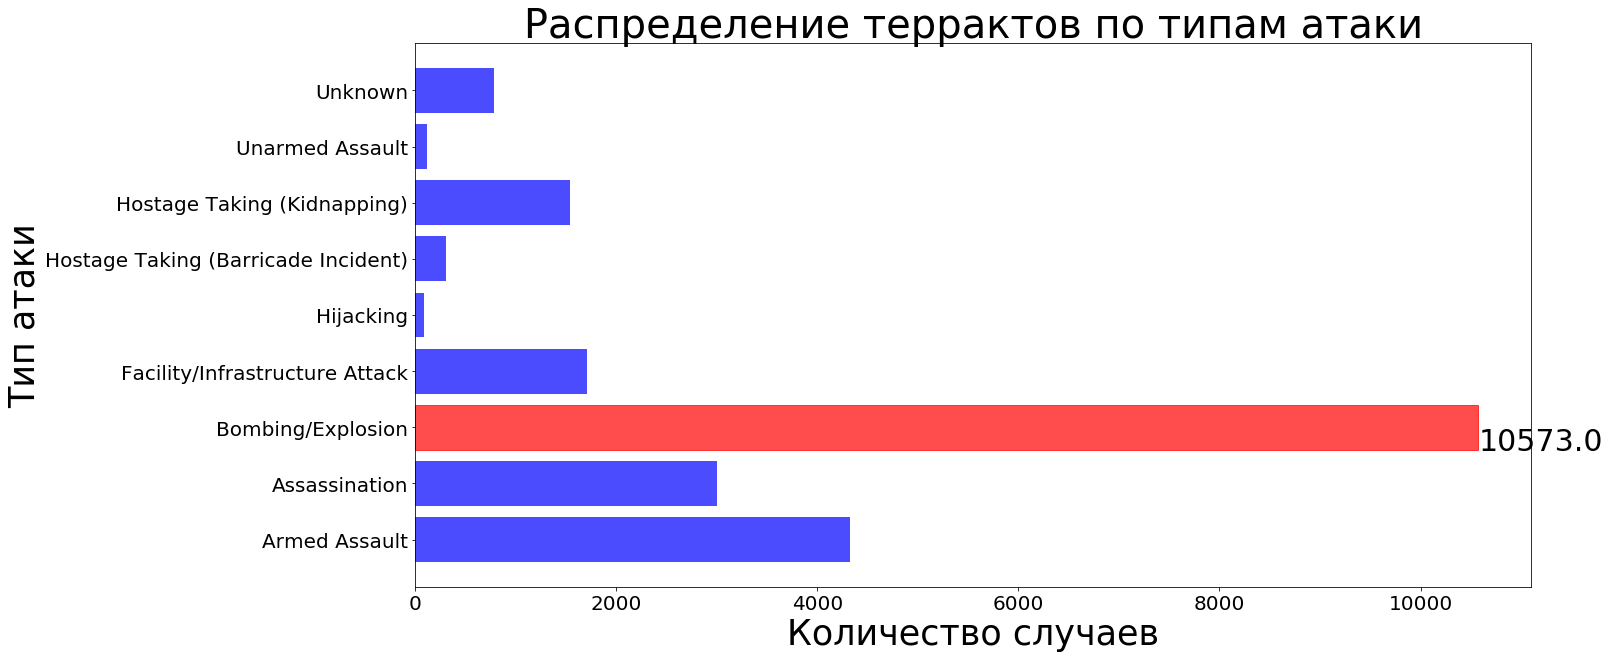

In [25]:
plt.figure(figsize=(20,10))
v=plt.barh(america_attack['attack'], america_attack['values'], color='blue', alpha=0.7)

widths = np.array([])
for el in v[:]:
    widths = np.append(widths, el.get_width())

max_width, max_num = np.max(widths), np.argmax(widths)

plt.text(max_width+10, v[max_num].get_y(), max_width, size=30)
v[max_num].set_color('red')

plt.ylabel('Тип атаки', fontsize=35)
plt.xlabel('Количество случаев', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Распределение террактов по типам атаки", fontsize=40)
plt.show()

### Виды оружения/действия примененных для совершения террористического акта

In [26]:
america_weaptype = america_data.groupby('weaptype1_txt').size().reset_index()

In [27]:
america_weaptype.columns = ['weaptype', 'values']

In [28]:
america_weaptype.sort_values(by='values', ascending=False)

,weaptype,values
2,Explosives,10655
4,Firearms,7207
10,Unknown,2231
5,Incendiary,1974
6,Melee,205
1,Chemical,52
9,Sabotage Equipment,34
0,Biological,25
7,Other,24
11,Vehicle (not to include vehicle-borne explosiv...,18


### Распределение подвидов атак среди взрывчатки (самого популярного типа атаки)

In [29]:
america_weapsubtype = america_data[america_data['weaptype1_txt'] == 'Explosives']

In [30]:
america_weapsubtype = america_weapsubtype.groupby('weapsubtype1_txt').size().reset_index()

In [31]:
america_weapsubtype.columns = ['weapsubtype', 'values']

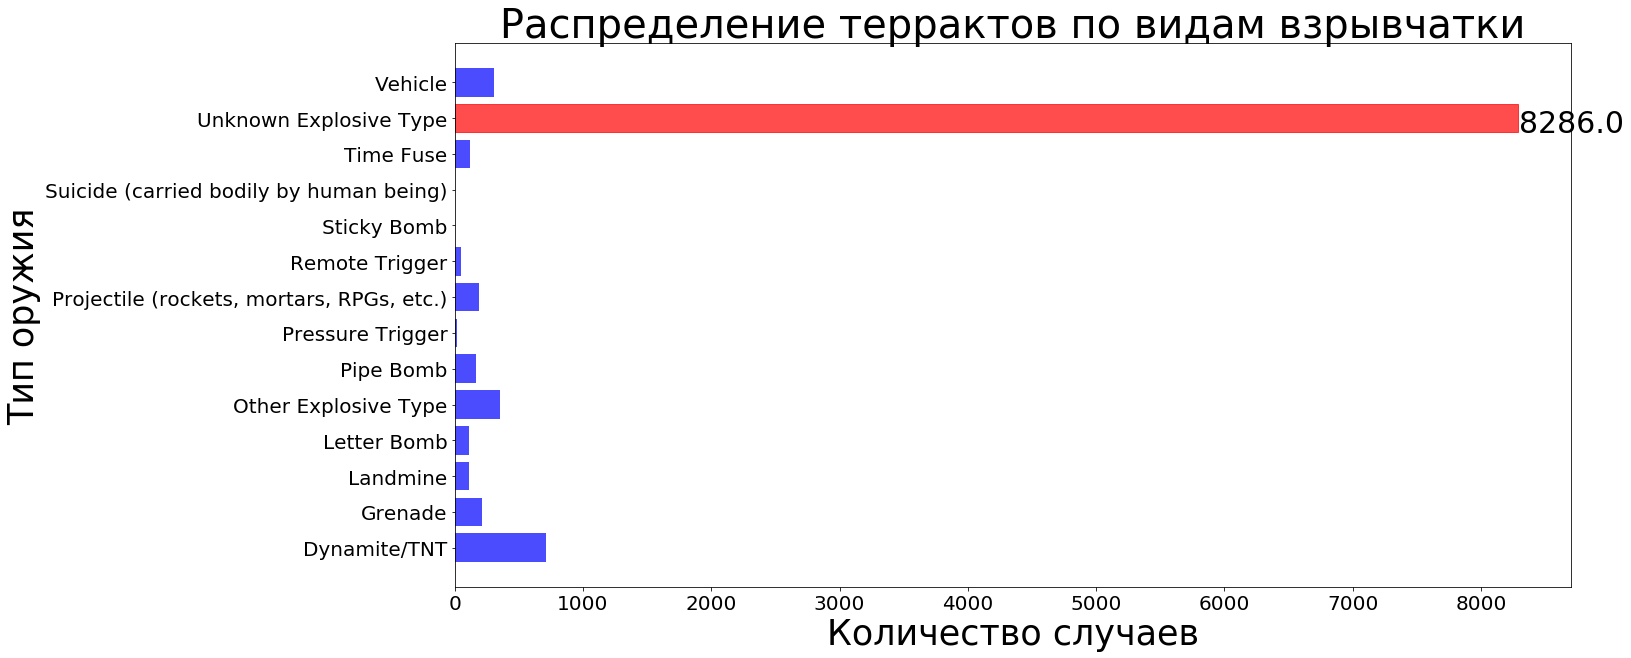

In [32]:
plt.figure(figsize=(20,10))
v=plt.barh(america_weapsubtype['weapsubtype'], america_weapsubtype['values'], color='blue', alpha=0.7)

widths = np.array([])
for el in v[:]:
    widths = np.append(widths, el.get_width())

max_width, max_num = np.max(widths), np.argmax(widths)

plt.text(max_width+10, v[max_num].get_y(), max_width, size=30)
v[max_num].set_color('red')

plt.ylabel('Тип оружия', fontsize=35)
plt.xlabel('Количество случаев', fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Распределение террактов по видам взрывчатки", fontsize=40)
plt.show()

### Также посмотрим несколько графиков изменения во времени

### График ежегодного изменения количества террактов в Южной и Северной Америке

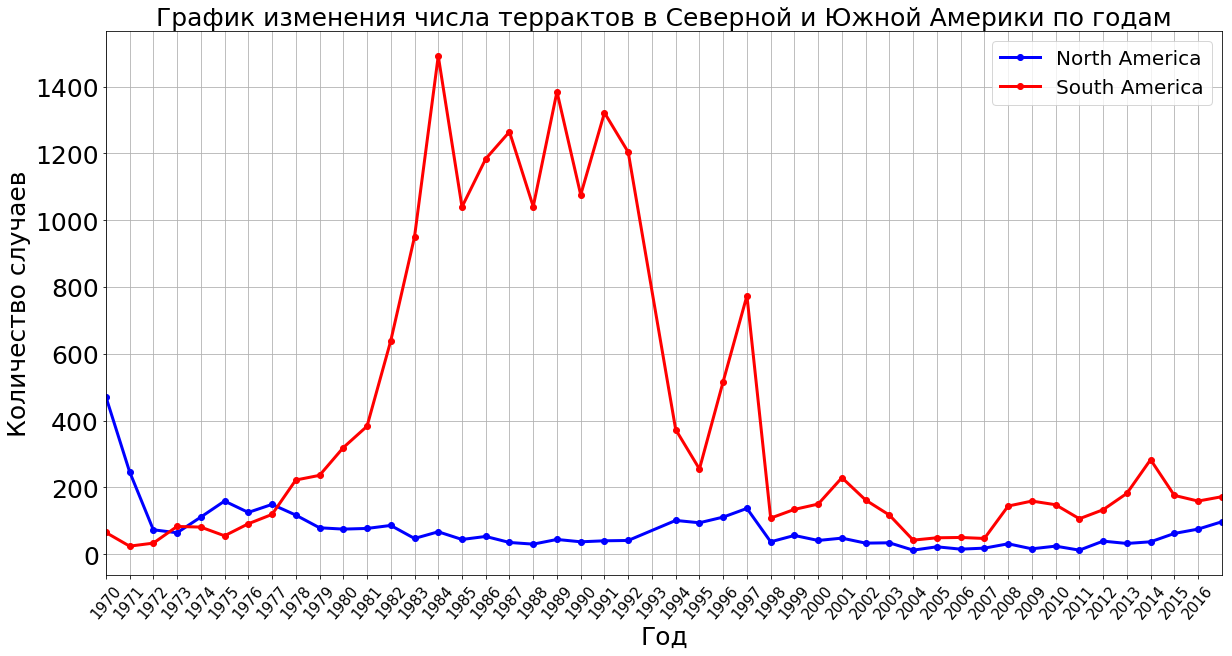

In [33]:
pd.crosstab(america_data['iyear'], america_data['region_txt']).plot(
    marker='o', figsize=(20,10), linewidth=3, colors=['blue', 'red'])
plt.title("График изменения числа террактов в Северной и Южной Америки по годам", 
          fontsize=25)
plt.ylabel('Количество случаев', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.xticks(np.arange(1970, 2017, step=1),fontsize=15,rotation=50)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.grid()
plt.show()

### График ежегодного изменения количества террактов по видам оружия

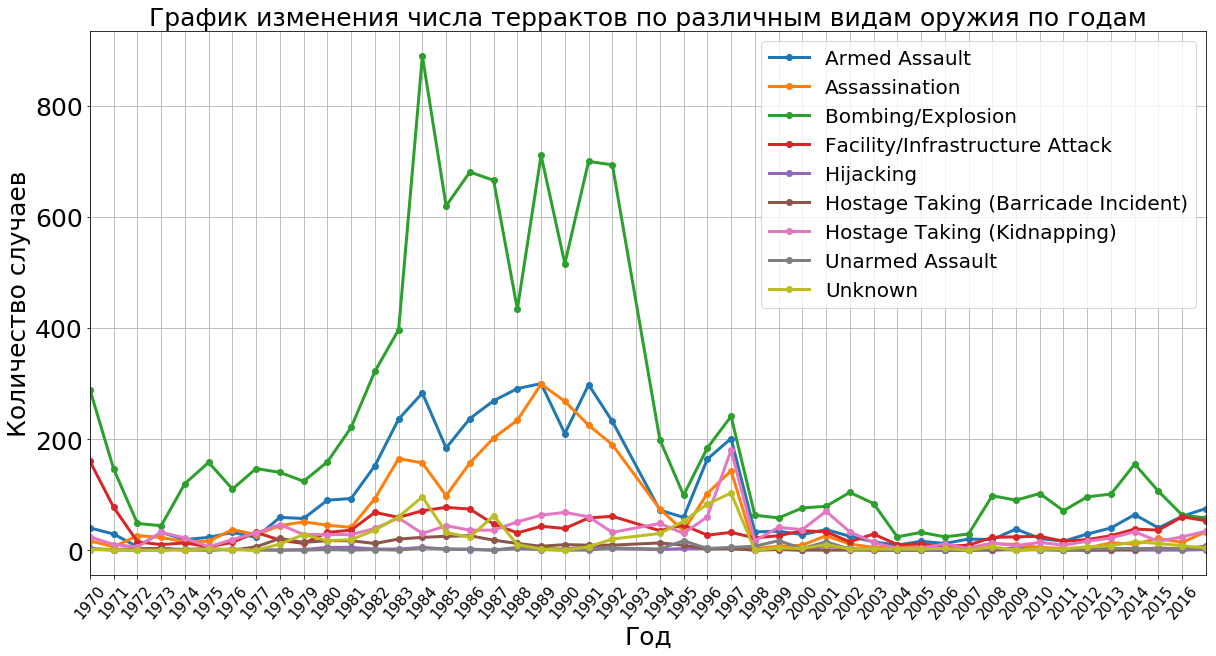

In [34]:
pd.crosstab(america_data['iyear'], america_data['attacktype1_txt']).plot(
    figsize=(20,10),marker='o',linewidth=3)
plt.title("График изменения числа террактов по различным видам оружия по годам", 
          fontsize=25)
plt.ylabel('Количество случаев', fontsize=25)
plt.xlabel('Год', fontsize=25)
plt.xticks(np.arange(1970, 2017, step=1),fontsize=15, rotation=50)
plt.yticks(fontsize=25)
plt.grid()
plt.legend(fontsize=20)
plt.show()